# Лабораторная работа №9

### Выполнил Рыбаков Владислав, БПМ201, 29 вариант

Задания 9.1.29, 9.3.10, 9.5.29, 9.6.29

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 9.1.29

Методом Ньютона найти минимум и максимум унимодальной на
отрезке $[-1, 1]$ функции $f(x) = 2 \sin{x} - 3 \cos{x}$ с точностью $\varepsilon = 10^{-6}$. Предусмотреть подсчет числа
итераций, потребовавшихся для достижения заданной точности.

In [2]:
import math

# Изначальная функция 
def f(x):
    return 2 * np.sin(x) - 3 * np.cos(x)

# Первая производная
def df(x):
    return 2 * np.cos(x) + 3 * np.sin(x)

# Вторая производная
def d2f(x):
    return -2 * np.sin(x) + 3 * np.cos(x)

# Метод Ньютона
def newton_method(f, df, d2f, x0, epsilon):
    x = x0
    iterations = 1
    x_new = x - df(x) / d2f(x)
    while abs(x_new - x) > epsilon:
        x = x_new
        x_new = x - df(x) / d2f(x)
        iterations += 1
    return x, iterations

In [3]:
# Заданные параметры
a = -1
b = 1
epsilon = 1e-6

# Находим минимум на отрезке [-1, 1]
min_x, min_iterations = newton_method(f, df, d2f, a, epsilon)

print(f"Минимум: x = {min_x}, f(x) = {f(min_x)}, число итераций = {min_iterations}")

Минимум: x = -0.5880026035475675, f(x) = -3.6055512754639896, число итераций = 4


In [4]:
x = np.arange(-1, 1.01, 0.02)
y = [f(i) for i in x]

# Вторая производная
d2f(x)

array([ 3.30384889,  3.33206238,  3.35894309,  3.38448028,  3.40866371,
        3.43148372,  3.45293119,  3.47299753,  3.49167472,  3.50895528,
        3.52483231,  3.53929945,  3.55235092,  3.5639815 ,  3.57418653,
        3.58296194,  3.5903042 ,  3.5962104 ,  3.60067816,  3.60370569,
        3.60529179,  3.60543582,  3.60413773,  3.60139803,  3.59721781,
        3.59159876,  3.58454312,  3.57605371,  3.56613392,  3.55478773,
        3.54201967,  3.52783485,  3.51223894,  3.49523818,  3.47683938,
        3.45704988,  3.43587761,  3.41333104,  3.38941918,  3.36415159,
        3.3375384 ,  3.30959023,  3.28031826,  3.24973422,  3.21785032,
        3.18467933,  3.15023451,  3.11452963,  3.07757899,  3.03939735,
        3.        ,  2.95940269,  2.91762165,  2.87467361,  2.83057573,
        2.78534566,  2.73900149,  2.69156176,  2.64304544,  2.59347193,
        2.54286107,  2.4912331 ,  2.43860867,  2.38500883,  2.33045502,
        2.27496905,  2.21857313,  2.16128981,  2.103142  ,  2.04

Поскольку на данном отрезке вторая производная всегда строго положительна, то функция имеет только один экстремум - минимум на заданном отрезке. **Это значит, что максимум данной функции достигается на одном из концов отрезка.**

In [5]:
x_left = f(a)
x_right = f(b)
print(x_left, x_right)

-3.3038488872202123 0.062035052011373715


**Получили, что максимум функции достигается на правом конце отрезка**

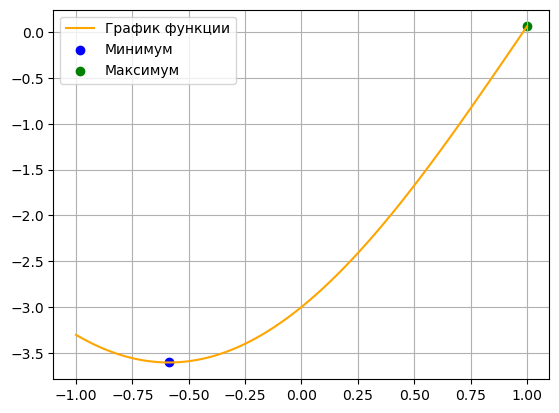

In [6]:
plt.plot(x, y, color="orange", label="График функции")
plt.scatter(min_x, f(min_x), color="blue", label="Минимум")
plt.scatter(b, f(b), color="green", label="Максимум")
plt.legend()
plt.grid(True)
plt.show()

### Задание 9.3.10

Функция $x(t)$ задана неявно уравнением $F(x,t)= x^4 - 10 \sin{t} +5x = 0$, $\text{  }$ $0\leq t \leq 2$, $0 \leq x \leq 2$. Построить график зависимости функции $x(t)$ на заданном отрезке $[0, 2]$ и найти ee минимум и максимум с точностью $\varepsilon = 10^{-6}$ методом золотого сечения.

Минимум функции: t = 0.0, x(t) = 0.0
Максимум функции: t = 1.5757569505110385, x(t) = 1.3451564685728823


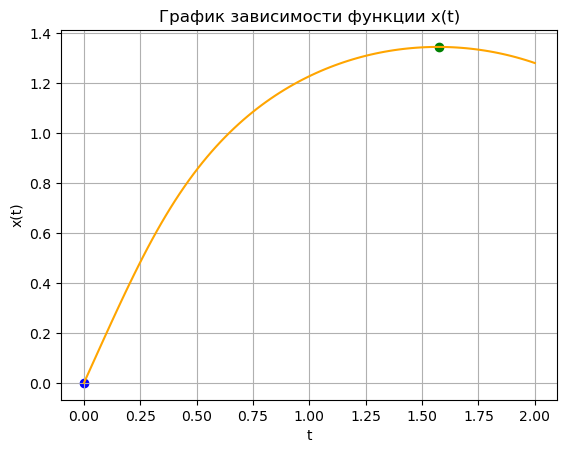

In [7]:
from scipy.optimize import fsolve, minimize_scalar, golden

# Функция F(x, t)
def F(x, t):
    return x**4 - 10*np.sin(t) + 5*x

# Границы интервала, на котором будем искать экстремумы
a = 0.
b = 2.

# Диапазон значений t на отрезке [0, 2]
t_values = np.linspace(a, b, 100)

# Инициализируем пустой список для значений x(t)
x_values = []

# Находим значения x(t) для каждого t с помощью метода fsolve
for t in t_values:
    x_t = fsolve(F, x0=1, args=(t,))  # Начальное приближение x0=1
    x_values.append(x_t[0])
    
    
# Функция для поиска минимума функции x(t)
def find_min(t):
    # Интерполируем массивы 't_values' и 'x_values' для получения функции x(t)
    x_t = np.interp(t, t_values, x_values)
    return x_t

# Функция для поиска максимума функции x(t)
def find_max(t):
    # Интерполируем массивы 't_values' и 'x_values' для получения функции x(t)
    x_t = np.interp(t, t_values, x_values)
    return -x_t  # Максимум - это минимум инвертированной функции

# Находим минимум и максимум с использованием метода золотого сечения
min_result = minimize_scalar(find_min, bracket=(a, b), method='golden', tol=1e-6)
max_result = minimize_scalar(find_max, bracket=(a, b), method='golden', tol=1e-6)

# Получаем значения минимума и максимума
min_t = min_result.x
min_x = find_min(min_t)

max_t = max_result.x
max_x = find_min(max_t)

# Выводим результаты
print(f"Минимум функции: t = {min_t}, x(t) = {min_x}")
print(f"Максимум функции: t = {max_t}, x(t) = {max_x}")

# Построение графика
plt.plot(t_values, x_values, color="orange", label="График функции")
plt.scatter(min_t, min_x, color="blue", label="Минимум")
plt.scatter(max_t, max_x, color="green", label="Максимум")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('График зависимости функции x(t)')
plt.grid(True)
plt.show()

### Задание 9.5.29

Найти минимум функции 2-х переменных $f(x,y) = 5x^2 + y^2 + e^{x+1}\sin{y}$ с точностью $\varepsilon = 10^{-6}$ на прямоугольнике $[-2,2] \times [-2,2]$. 


In [8]:
def f(x):
    return 5*x[0]**2 + x[1]**2 + np.sin(x[1]) * np.e**(x[0]+1)

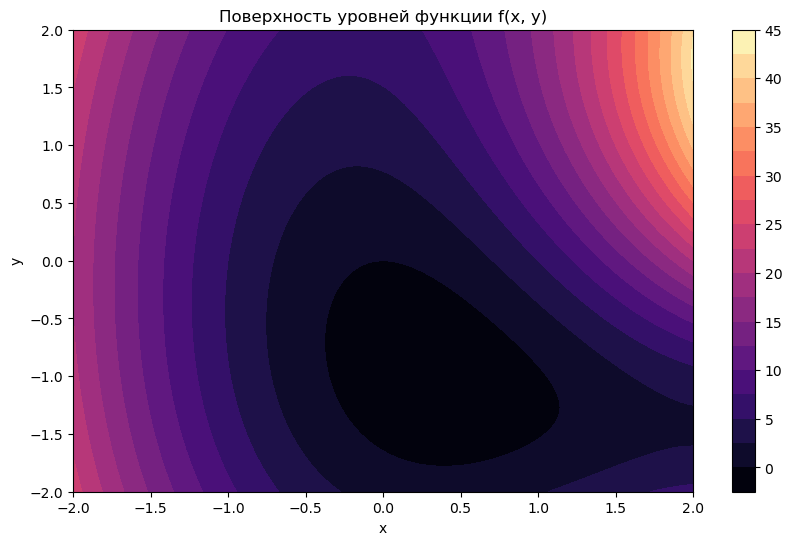

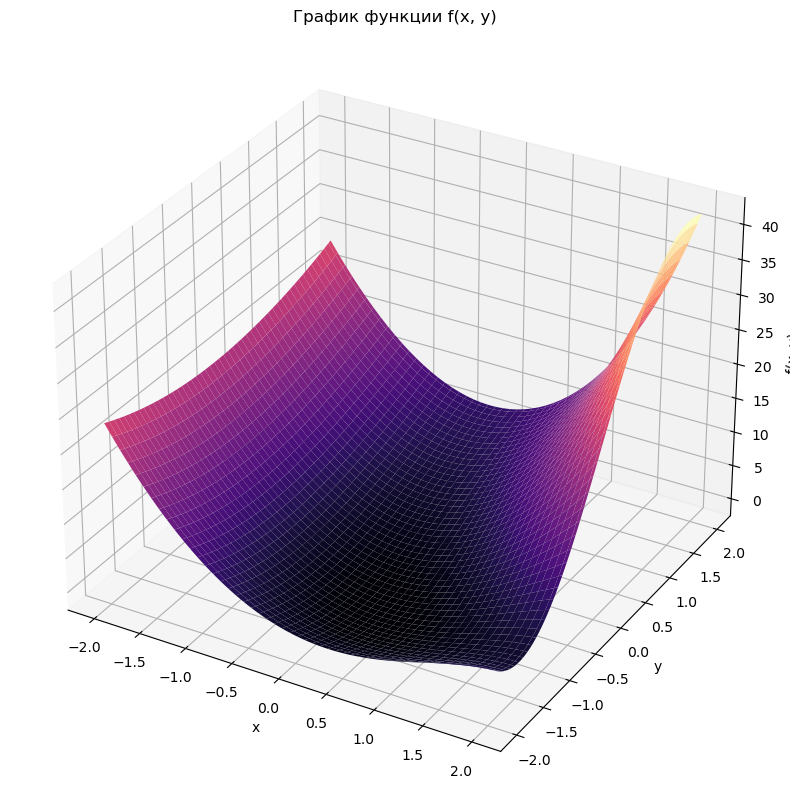

In [9]:
# Создание сетки точек для x и y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции f(x, y) для всех точек сетки
Z = f([X, Y])

# Построение поверхности уровней функции f(x, y)
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=20, cmap='magma')  # График с контурами и заливкой цветом
plt.colorbar()  # Цветовая шкала
plt.title('Поверхность уровней функции f(x, y)')
plt.xlabel('x')
plt.ylabel('y')

# Построение графика функции f(x, y)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='magma')
ax.set_title('График функции f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

Из графика видно, что на данном секторе у функции имеется только один экстремум - точка минимума. Для начального приближения возьмем точку $[0,-1]$, которая находится довольно близко к точке минимума.

In [10]:
from scipy.optimize import minimize

result = minimize(f, [0.,-1.], method='BFGS', tol=1e-6)

# Выводим результаты
print("Минимум найден на точке:", result.x)
print("Минимальное значение функции:", result.fun)

Минимум найден на точке: [ 0.3132169  -1.00173602]
Минимальное значение функции: -1.6381697419165397


### Задание 9.6.29

Указанным в индивидуальном варианте методом (Покоординатный спуск) найти минимум квадратичной функции 

$$ f(x,y) = 1.5 x^2 + 2xy + 2.5y^2 + 8x -14y$$ 

с точностью $\varepsilon = 10^{-6}$. Для решения задачи одномерной минимизации использовать метод Ньютона. Построить график функции $f$. Предусмотреть подсчет числа
итераций, потребовавшихся для достижения заданной точности.

In [11]:
from scipy.optimize import newton

# Функцию f(x, y)
def f(x, y):
    return 1.5 * x**2 + 2 * x * y + 2.5 * y**2 + 8 * x - 14 * y

# Градиент функции f(x, y)
def gradient(x, y):
    df_dx = 3 * x + 2 * y + 8
    df_dy = 2 * x + 5 * y - 14
    return df_dx, df_dy

# Начальное приближение и точность
x0 = 0.0
y0 = 0.0
epsilon = 1e-6

iterations = 0

while True:
    # Вычисление градиента в текущей точке
    df_dx, df_dy = gradient(x0, y0)
    
    # Метод Ньютона для одномерной минимизации x
    x_new = newton(lambda x: gradient(x, y0)[0], x0, tol=epsilon)
    
    x0 = x_new
    
    # Метод Ньютона для одномерной минимизации y
    y_new = newton(lambda y: gradient(x0, y)[1], y0, tol=epsilon)
    
    # Проверка условия остановки
    if abs(x_new - x0) < epsilon and abs(y_new - y0) < epsilon:
        break
    
    y0 = y_new
    iterations += 1

# Найденный минимум
minimum = f(x0, y0)

print(f"Минимум функции: x = {x0}, y = {y0}, f(x, y) = {minimum}")
print(f"Количество итераций: {iterations}")

Минимум функции: x = -6.181817727281605, y = 5.272726590922408, f(x, y) = -61.63636363636278
Количество итераций: 12


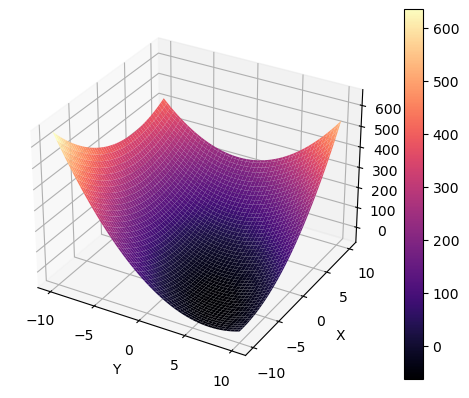

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Создание сетки значений для x и y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значения функции f(x, y) для каждой пары (x, y)
Z = f(X, Y)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
surf = ax.plot_surface(Y, X, Z, cmap='magma')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf)
plt.show()